In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use( 'tkagg' )
from scipy import stats
%matplotlib inline

In [21]:
loan_data = pd.read_csv('loan_data.csv')

In [22]:
loan_data.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [23]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [24]:
loan_data.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [25]:
import pandas_profiling

In [26]:
pandas_profiling.ProfileReport(loan_data)

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]


From the report, we can find a ton of useful information. I especially like the histograms of each variable as it helps give a better understand of the data and the distributions. We also can easily see that out testing variable, not.fully.paid, is not balanced. We may need to keep this in mind as we train and test our model.

Now I'm going to explore the data by looking at how the features interact with each other.

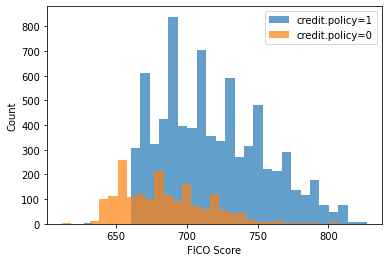

In [27]:
#FICO scores are supposed to be a good indicator of credit so let's look at that first.
#Let's look at the distribution of FICO scores for those approved to be borrowers or not.
plt.hist(loan_data[loan_data['credit.policy']==1]['fico'], alpha = 0.7, bins = 30, label='credit.policy=1')
plt.hist(loan_data[loan_data['credit.policy']==0]['fico'], alpha = 0.7, bins = 30, label='credit.policy=0')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.legend(loc='best')
plt.show()

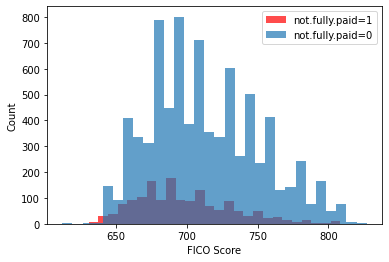

In [28]:
#Let's do it by whether they paid or not
_ = plt.hist(loan_data[loan_data['not.fully.paid']==1]['fico'], alpha = 0.7, bins = 30, label='not.fully.paid=1',color='r')
_ = plt.hist(loan_data[loan_data['not.fully.paid']==0]['fico'], alpha = 0.7, bins = 30, label='not.fully.paid=0')
_ = plt.xlabel('FICO Score')
_ = plt.ylabel('Count')
_ = plt.legend()


Although there is a difference in scale, the distribution is not so different between the FICO scores and whether they paid or not.

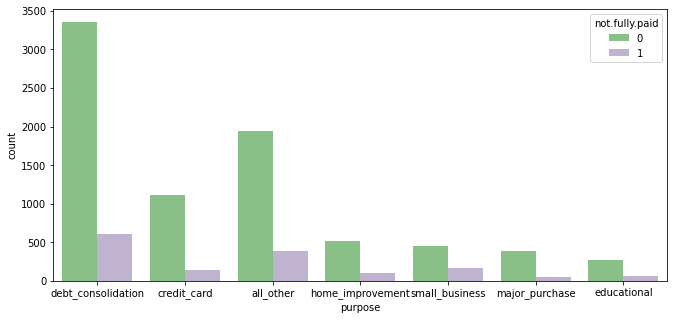

In [29]:
#Let's break it down by purpose and look at the counts for whether they paid or not
plt.figure(figsize=(11,5))
ax = sns.countplot(data=loan_data,x='purpose',hue='not.fully.paid',palette='Accent')

Based on the graph above, debt consolidation is one of the main reason of wanting a loan.

In [30]:
#I want to see the % of each as well to see what kind of inbalance we're dealing with and to see how unbalanced certain varibles are
x=pd.DataFrame(loan_data.groupby('not.fully.paid')['purpose'].value_counts())
x.rename(columns = {'purpose':'count'},inplace=True)
x=x.reset_index()
result = pd.crosstab(index=x['not.fully.paid'],columns=x['purpose'],values=x['count'],aggfunc='sum',normalize='columns')
result

purpose         all_other  credit_card  debt_consolidation  educational  \
not.fully.paid                                                            
0                0.833977     0.884311            0.847612     0.798834   
1                0.166023     0.115689            0.152388     0.201166   

purpose         home_improvement  major_purchase  small_business  
not.fully.paid                                                    
0                       0.829889        0.887872        0.722132  
1                       0.170111        0.112128        0.277868

<AxesSubplot:xlabel='purpose,not.fully.paid'>

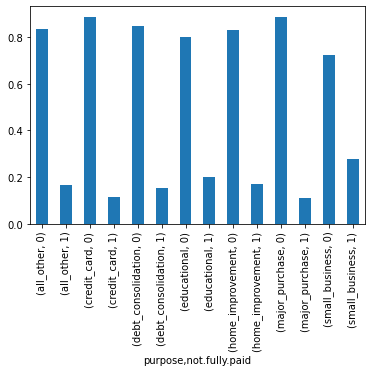

In [31]:
result.unstack().plot(kind='bar')

We see through this simple visualization that the small business loans had a slightly higher proportion of fully paid vs not, but, overall, we see that the distribution of not fully paid loans is pretty consistent across purposes.

AttributeError: 'JointGrid' object has no attribute 'annotate'

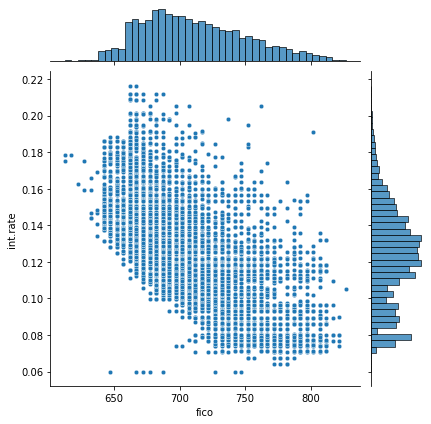

In [32]:
#Assuming FICO score and interest rate are somehow correlated so let's verify that.
g = sns.jointplot(data=loan_data,x='fico',y='int.rate', s = 20)
g = g.annotate(stats.pearsonr)

As we can see, there is a negative correlation between fico score and interest rates, as expected. Let's seperate this by whether they fully paid the loan or not and the credit policy they received.

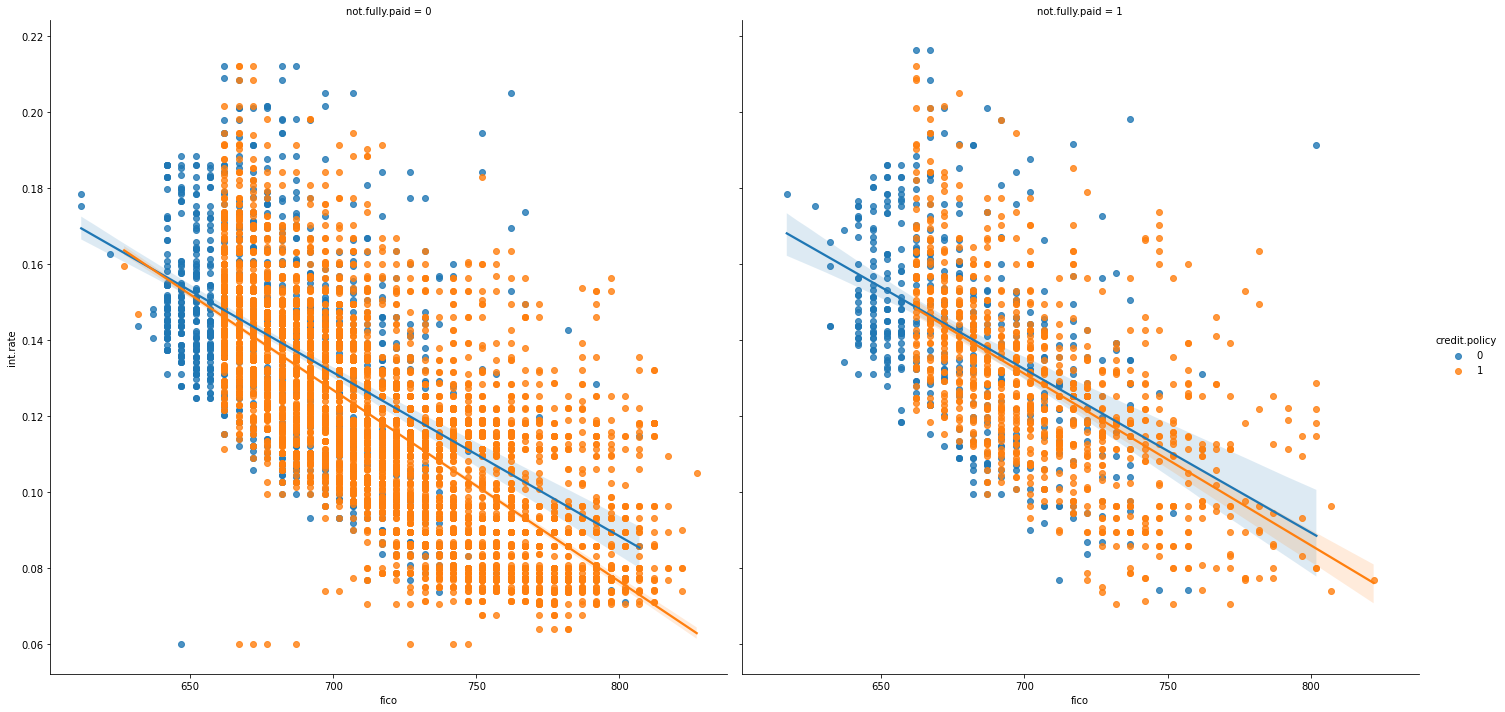

In [33]:
sns.lmplot(data=loan_data,x='fico',y='int.rate',col ='not.fully.paid',hue='credit.policy', height=10)


Its clear that, from the regression line, that those who had not met the credit policy tended to have a higher interest rate than their counterparts who did meet the policy when they paid for the loan. However, there's no real difference with those who did not fully pay. Regardless, there is a clear correlation between interest rate and fico score - the higher the fico score, the lower the interest rate you received (as expected).

# Building Our Model
# Preparing the Data
From our initial overview of the data, we see that we only have 1 categorical variable in our dataset. While it's not required in some decision trees/random forest algorithms, the sklearn toolkit we'll be using must take numerical values only. I'll be using one hot encoding (otherwise known as dummy variables) in order to represent this variable in the data.

In [34]:
cat_feats = ['purpose'] 

In [35]:
loan_data1 = pd.get_dummies(loan_data,columns=cat_feats,drop_first=True)
loan_data1.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0                    0                           1   
1        0               0                    1                           0   
2        0               0                    0                           1   
3        0               0                    0                           1   
4        0               0                    1                           0   

   purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0                    0                         0                       0   
1                    0                         0                       0   
2                    0                         0                       0   
3                    0                         0                       0   
4                    0                         0                       0   

   purpose_small_business  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [36]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split

In [37]:
X1 = loan_data1.drop('not.fully.paid',axis=1)
y1 = loan_data1['not.fully.paid']

In [38]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=101)


# Decision Tree Model

We'll start with the decision tree model

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier()
dtree1.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [40]:
dtpredictions1 = dtree1.predict(X1_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix


In [42]:
print(confusion_matrix(y1_test,dtpredictions1))
print(classification_report(y1_test,dtpredictions1))

[[1995  436]
 [ 337  106]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



# Random Forest Model
Now we'll use random forest to see if we can get a better model with it.

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(n_estimators=200)
rfc1.fit(X1_train,y1_train)

RandomForestClassifier(n_estimators=200)

In [45]:
rfc1_pred=rfc1.predict(X1_test)


In [46]:
print(confusion_matrix(y1_test,rfc1_pred))
print(classification_report(y1_test,rfc1_pred))

[[2420   11]
 [ 435    8]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.42      0.02      0.03       443

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874



It's apparent that the random forest makes less overall errors than the decision tree, but we see that the recall looks to be almost perfect for 0 and the opposite for 1. This could be due to the skewed data, but ultimately means that this model is great for avoiding False Negatives, which, in our case, is the opposite of what we want in a model. We want to be on the conservative end and make less false positives (meaning we think they will fully pay but they don't actually pay it all) than false negatives where we say they won't pay and they actually do.

Unlike other classifiers, because decision trees model discrete probabilities (the result is either a 0 or a 1), ROC curves and CAP curves will not be very beneficial to us in helping us understand the model. Therefore, the confusion matrix and classification report will be what we rely on for understanding our model.

# Decision Tree & Random Forest - Accounting for Inbalanced data
Because decision trees and random forest models are very sensitive to inbalanced datasets, I'm going to try and account for the data inbalance by applying weights to see if the model improves.

In [47]:
dtree2 = DecisionTreeClassifier(class_weight = "balanced")
dtree2.fit(X1_train,y1_train)
dtpredictions2 = dtree2.predict(X1_test)

In [48]:
print(confusion_matrix(y1_test,dtpredictions2))
print(classification_report(y1_test,dtpredictions2))

[[2050  381]
 [ 354   89]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2431
           1       0.19      0.20      0.19       443

    accuracy                           0.74      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.74      0.75      2874



In [49]:
rfc2 = RandomForestClassifier(n_estimators=200, class_weight = "balanced")
rfc2.fit(X1_train,y1_train)
rfc2_pred=rfc2.predict(X1_test)

In [50]:
print(confusion_matrix(y1_test,rfc2_pred))
print(classification_report(y1_test,rfc2_pred))

[[2429    2]
 [ 440    3]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.60      0.01      0.01       443

    accuracy                           0.85      2874
   macro avg       0.72      0.50      0.46      2874
weighted avg       0.81      0.85      0.78      2874



It looks like the decision tree increased it's accuracy slightly by balancing the data, while the random forest model had reduced performance.

If we had to choose one of these models for application, we would choose the decision tree model due to less type 1 errors (less false positivies). The random forest model performs only slightly better than our default of saying all users will not default and having a 19% fail rate for type 1 errors (the random forest has an 18% fail rate and the decision tree has a 16% fail rate). Although this is improvement from the default, other models would need to be tested to see if there is a model that would perform better than our decision tree.

Future improvements to this model could potentially be made by tuning the hyperparameters of these models to see if that improves the performance. In the future, I would like to see if K-fold cross validation utilizing sklearn's randomsearchCV and gridsearch could produce a better model by finding the most optimal hyperparameters.

# Conclusion
I created decision tree and random forest models to try and predict loan defaults from this dataset. Although the random forest had a greater overall accuracy, the decision tree had less false positives, which is the error we want to minimize when considering who to loan money to - we want to minimize loaning to people who we think will pay back, but who end up not paying the money. The decision tree model could then be utilized on new datasets to determine if one should loan money or not to the user.

In the future, I would like to improve upon the model by tuning hyperparameters for the decision tree as well as trying out other models on this dataset.